<a href="https://colab.research.google.com/github/MorawoLekanDavid/ML_projects/blob/main/heartDpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filepath = '/content/heart disease/Train Dataset .csv'
df = pd.read_csv(filepath)
df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [71]:
df['thal'].value_counts()

,count
thal,
1,1879
3,1822
2,1813
0,1789


In [72]:
attr = ['Sex','cp','fbs','restecg','exang','slope','ca','thal']
cat_df = df[attr]
cat_df.head()

,Sex,cp,fbs,restecg,exang,slope,ca,thal
0,0,1,1,0,0,1,4,1
1,1,2,0,1,0,2,1,0
2,1,2,1,0,0,1,3,1
3,0,0,1,2,1,0,2,2
4,1,2,1,1,1,2,4,0




```
# This is formatted as code
```

# Exploratory Data Analysis

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


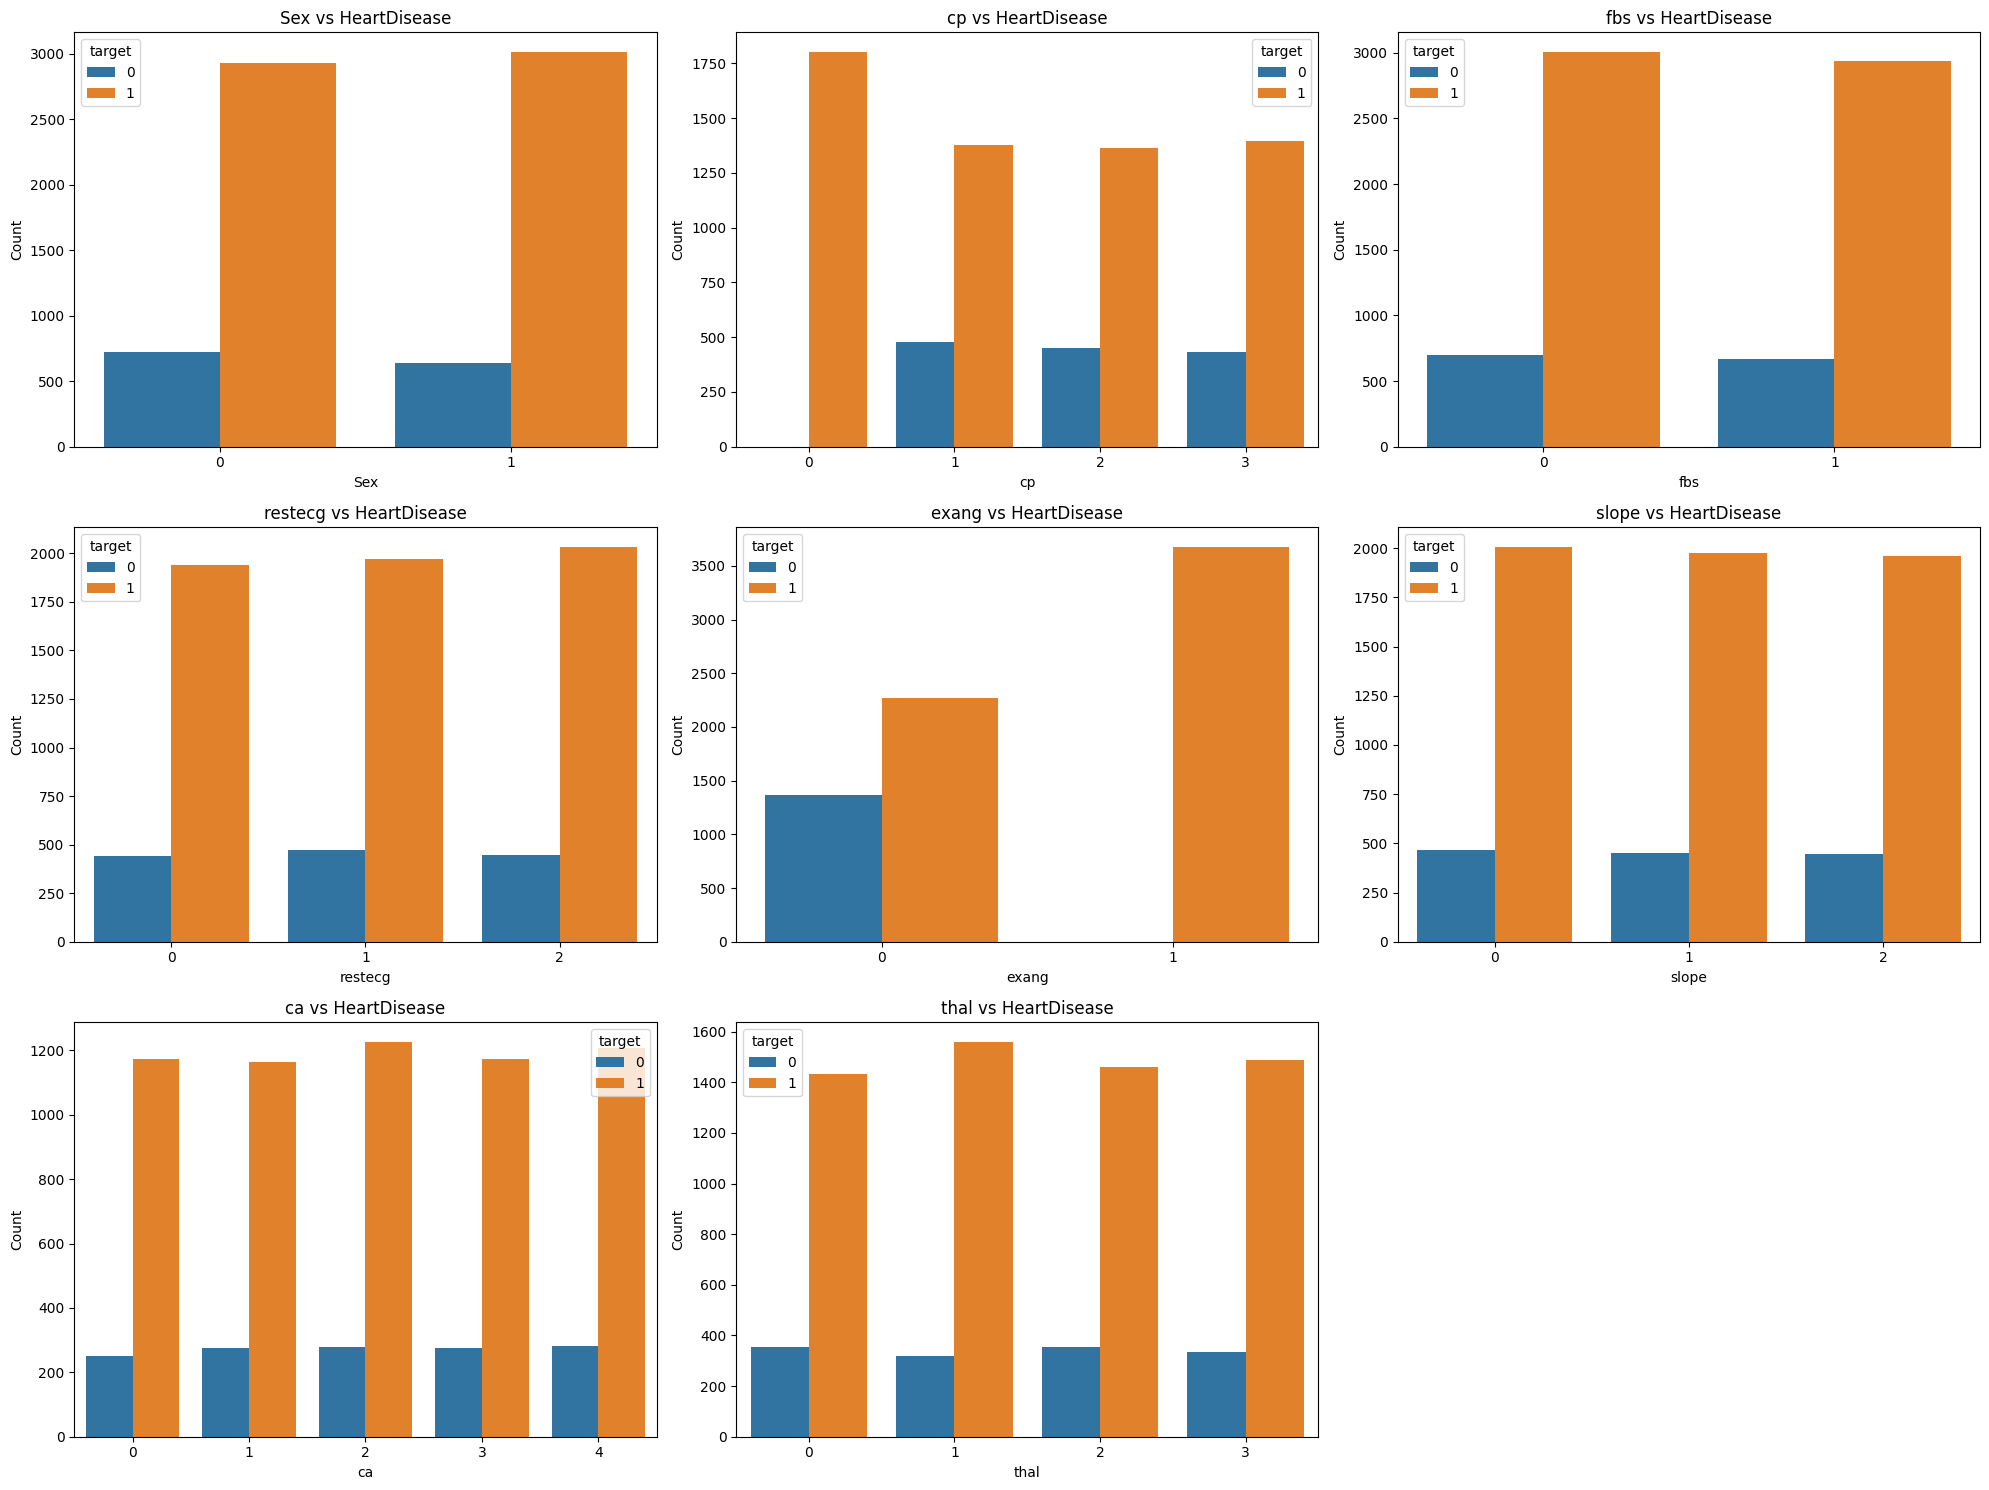

In [74]:
# We visualize each categorical variable with HeartDisease
plt.figure(figsize=(20, 15))

for i, feature in enumerate(cat_df, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=feature, hue='target')
    plt.title(f'{feature} vs HeartDisease')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


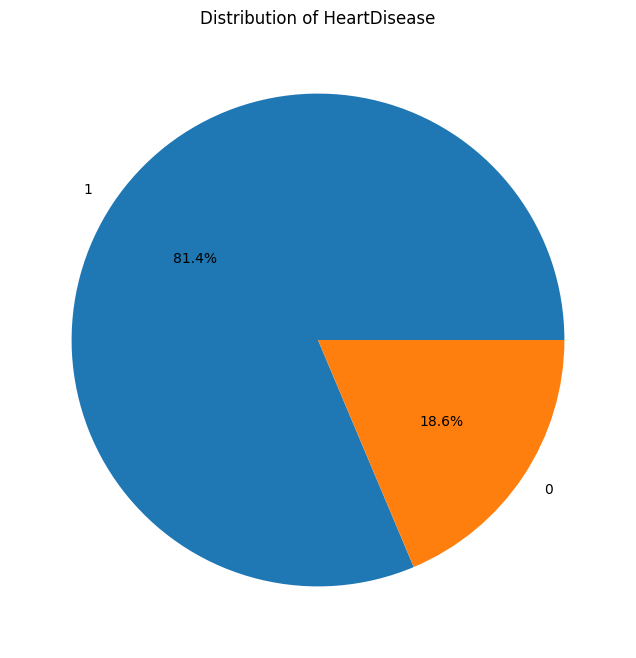

In [75]:
plt.figure(figsize=(8, 8))
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.title('Distribution of HeartDisease')
plt.ylabel('')
plt.show()

In [76]:
categorical_analysis = {}

for feature in cat_df:
    cross_tab = pd.crosstab(df[feature], df['target'], normalize='index')
    categorical_analysis[feature] = cross_tab


# Let's convert the analysis results of categorical variables into a DataFrame
categorical_analysis_df = pd.concat(categorical_analysis.values(), keys=categorical_analysis.keys())
categorical_analysis_df

target            0         1
Sex     0  0.198413  0.801587
        1  0.174568  0.825432
cp      0  0.000000  1.000000
        1  0.258342  0.741658
        2  0.248622  0.751378
        3  0.235648  0.764352
fbs     0  0.188006  0.811994
        1  0.184949  0.815051
restecg 0  0.185480  0.814520
        1  0.194103  0.805897
        2  0.179984  0.820016
exang   0  0.375413  0.624587
        1  0.000000  1.000000
slope   0  0.187854  0.812146
        1  0.185567  0.814433
        2  0.186047  0.813953
ca      0  0.176388  0.823612
        1  0.191800  0.808200
        2  0.185382  0.814618
        3  0.189917  0.810083
        4  0.188844  0.811156
thal    0  0.198435  0.801565
        1  0.170303  0.829697
        2  0.194705  0.805295
        3  0.183315  0.816685


Sex: 80% of "0" have heart disease. 82% of "1" have heart disease.

ChestPAin: 100% of those who are "0" have heart disease. 74% of those with "1" have heart disease. 75% of those with "2" have heart disease. 76% of those with "3" have heart disease.

FastingBS (Fasting Blood Sugar): 81% of patients with fasting blood sugar below 120 mg/dl have heart disease. 82% of patients with fasting blood sugar above 120 mg/dl have heart disease.

RestingECG (Resting ECG Results): 81% of patients with "0" have heart disease. 80% of patients with "1" results have heart disease. 82% of patients with "2" have heart disease.

ExerciseAngina: 62% of patients "0" have heart disease. 100% of patients with "1" have heart disease.

Thal: 80% of patients with "0" have heart disease. 83% of patients with a "1" have heart disease. 80% of patients with "2" have heart disease. 82% of patients with "3" have heart disease.

In [77]:
num_df = df.drop(columns = attr, axis = 1)
num_df.head()

,Id,Age,trestbps,chol,thalach,oldpeak,target
0,16167,33,158,205,154,1.5,1
1,11275,53,198,154,104,0.8,0
2,13251,37,101,202,155,2.1,1
3,19921,75,113,306,88,4.9,1
4,11293,35,139,419,166,0.9,1


In [78]:
num_df.corr()

,Id,Age,trestbps,chol,thalach,oldpeak,target
Id,1.000000,-0.007837,-0.016580,0.015200,-0.012959,0.004434,0.006148
Age,-0.007837,1.000000,-0.022767,0.004541,0.000204,0.007193,-0.002846
trestbps,-0.016580,-0.022767,1.000000,-0.003238,0.001575,0.011277,0.009320
chol,0.015200,0.004541,-0.003238,1.000000,-0.014182,-0.003930,-0.012291
thalach,-0.012959,0.000204,0.001575,-0.014182,1.000000,0.012347,-0.004634
oldpeak,0.004434,0.007193,0.011277,-0.003930,0.012347,1.000000,0.004899
target,0.006148,-0.002846,0.009320,-0.012291,-0.004634,0.004899,1.000000


In [79]:
num_corr = num_df.corr()
num_corr['target'].sort_values(ascending = False)

,target
target,1.000000
trestbps,0.009320
Id,0.006148
oldpeak,0.004899
Age,-0.002846
thalach,-0.004634
chol,-0.012291


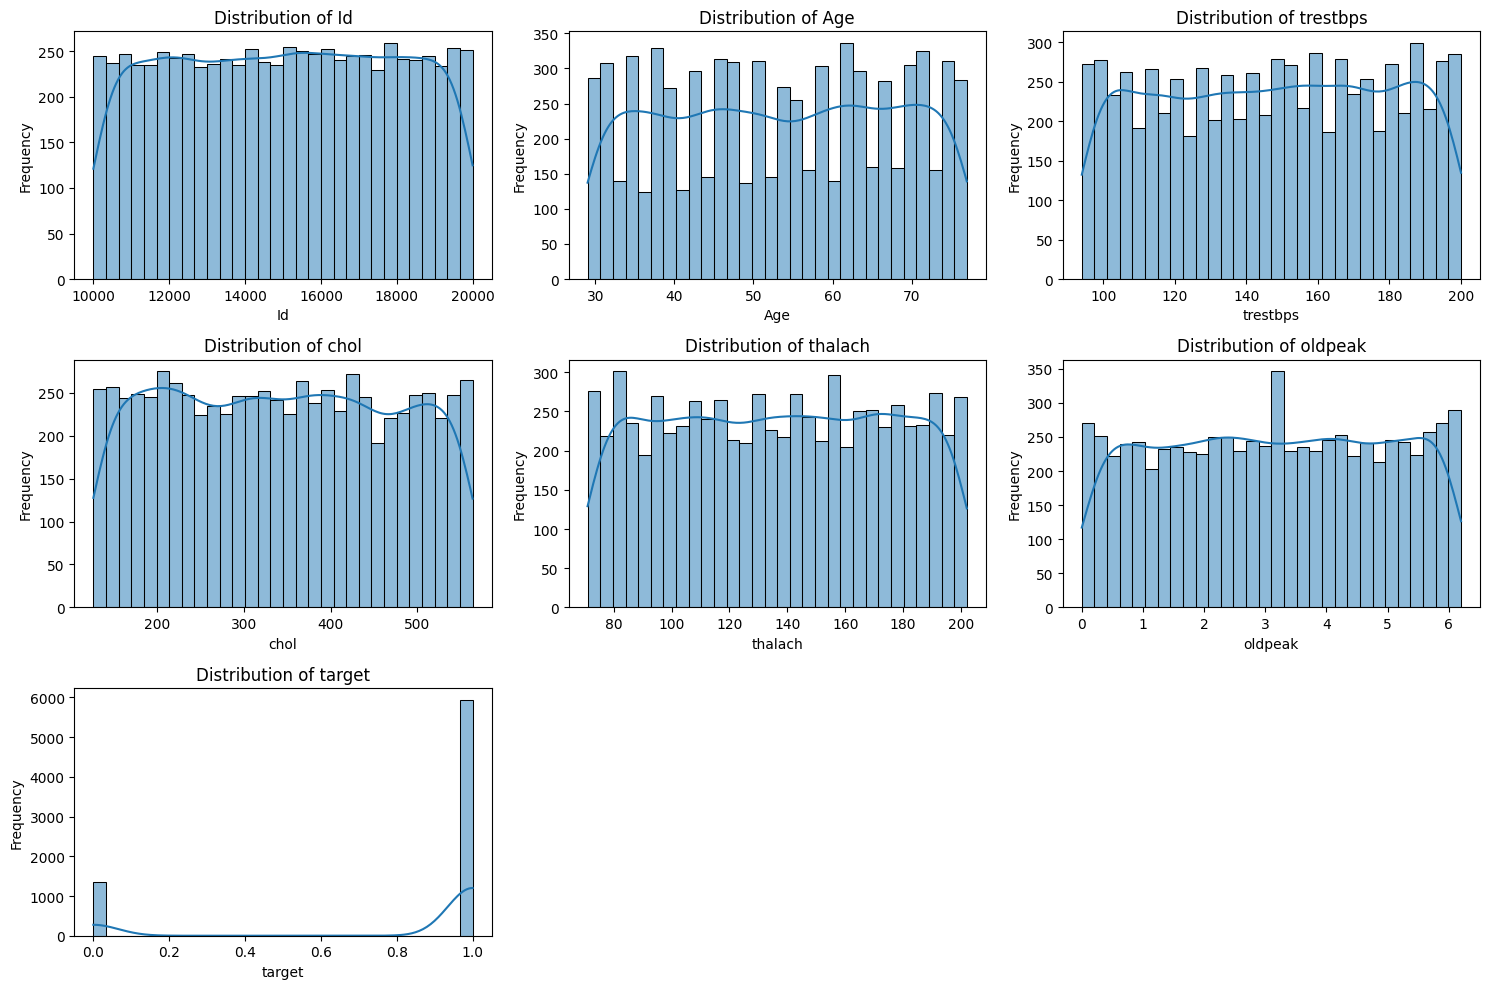

In [80]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_df, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [89]:
X = df.drop(columns = 'target',axis = 1)
y = df['target']

In [82]:
# Using custom transformer to detect outliers and replace the outliers with the median
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats

# Custom transformer to replace outliers with the median
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, factor=3):  # Factor defines the boundary of the outlier on Z-table
        self.factor = factor

    def fit(self, X, y=None):
        # Compute the median for each feature
        self.median_ = np.median(X, axis=0)
        return self

    def transform(self, X):
        z_scores = np.abs(stats.zscore(X))  # Replace df with your DataFrame
        X_out = np.where((z_scores > self.factor), self.median_, X)
        return X_out

In [83]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(OutlierRemover(), SimpleImputer(strategy='median'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'),OneHotEncoder(handle_unknown = "ignore"))

In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_columns = attr
num_columns = num_df.columns.drop(['Id', 'target'], errors='ignore')
preprocessor = ColumnTransformer(
    transformers= [
    ('cat', cat_pipeline, cat_columns),
    ('num',num_pipeline,num_columns)
  ],
    remainder='drop'
)
X_encoded = preprocessor.fit_transform(X)

In [103]:
cat_columns

['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [104]:
num_columns

Index(['Age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')

In [105]:
X_encoded

array([[ 1.        ,  0.        ,  0.        , ..., -1.0826714 ,
         0.45868387, -0.91000375],
       [ 0.        ,  1.        ,  0.        , ..., -1.48335245,
        -0.85229794, -1.3008387 ],
       [ 0.        ,  1.        ,  0.        , ..., -1.10624087,
         0.4849035 , -0.57500237],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -1.39693105,
         1.40259077, -1.24500513],
       [ 1.        ,  0.        ,  1.        , ..., -0.43843912,
         0.64222132,  0.15083396],
       [ 1.        ,  0.        ,  1.        , ...,  1.13285914,
         0.45868387,  0.93250384]])

In [113]:
num_feature_names = num_columns
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehotencoder'].get_feature_names_out(cat_columns)
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

# Create the DataFrame while ensuring 'Id' is included
# Use pd.DataFrame constructor with proper column names
X_encoded = pd.DataFrame(X_encoded, columns=np.concatenate([['Id'],all_feature_names]), index=X.index)

# Ensure the 'Id' column is fetched from the original DataFrame
X_encoded['Id'] = X['Id'].values

# Check the transformed DataFrame
X_encoded.head()

,Id,Age,trestbps,chol,thalach,oldpeak,Sex_0,Sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,16167,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,-1.422113,0.339337,-1.082671,0.458684,-0.910004
1,11275,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.012173,1.625618,-1.483352,-0.852298,-1.300839
2,13251,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,-1.140125,-1.493613,-1.106241,0.484904,-0.575002
3,19921,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.538762,-1.107729,-0.289166,-1.271812,0.988337
4,11293,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,-1.281119,-0.271646,0.598618,0.773320,-1.245005


In [116]:
from scipy.stats import randint, uniform

cv_folds = 5
n_iter_search = 10

# Define hyperparameter space for SVC
svc_param_distributions = {
    'C': [0.1, 1, 10, 100],  # C can be any float from 0.1 to 10
    'kernel': ['linear', 'rbf'],
    'gamma': [1e-3, 1e-4, 'scale', 'auto'],  # Kernel coefficient
}

# Define hyperparameter space for SGDClassifier
sgd_param_distributions = {
    'loss': ['hinge', 'log_loss'],
    'penalty': ['l2', 'l1'],
    'alpha': uniform(0.001, 0.1),  # Regularization strength
    'max_iter': randint(100, 200)
}

# Define hyperparameter space for RandomForestClassifier
rf_param_distributions = {
    'n_estimators': randint(50, 100),  # Number of trees
    'max_depth': randint(5, 50),  # Maximum depth of trees
    'bootstrap': [True, False],  # Whether to use bootstrap samples
}

knn_param_distributions = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size': [20, 30, 40]
}
# RidgeClassifier
ridge_param_distributions = {
    'alpha': [0.1, 1, 10],
    'fit_intercept': [True, False],
    'solver': ['auto', 'cholesky', 'lsqr', 'sparse_cg']
}


In [117]:

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define your models
models = {
    'sgd_clf': SGDClassifier(),
    'svc': SVC(),
    'rnd_forest': RandomForestClassifier(),
    'rdg_clf': RidgeClassifier(),
    'knn': KNeighborsClassifier()
}
param_distributions = {
    'sgd_clf': sgd_param_distributions,
    'svc': svc_param_distributions,
    'knn': knn_param_distributions,
    'rdg_clf': ridge_param_distributions,
    'rnd_forest': rf_param_distributions
}


Training sgd_clf...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Best parameters for sgd_clf: {'alpha': 0.01006064345328208, 'loss': 'log_loss', 'max_iter': 150, 'penalty': 'l1'}

Cross-validation accuracy scores for sgd_clf: [0.70020534 0.81314168 0.68788501 0.81369863 0.81369863]
Mean cross-validation accuracy for sgd_clf: 0.7657258586256364

precision score for sgd_clf: 0.8607659574468085
recall score for sgd_clf: 0.8512035010940919


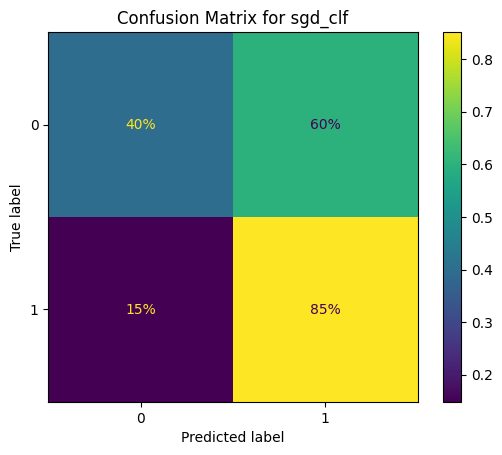

Training svc...


KeyboardInterrupt: 

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, cross_val_score,cross_val_predict
from sklearn.metrics import precision_score, recall_score,roc_auc_score,ConfusionMatrixDisplay
#randomized search
model_recall_scores = {}
# Iterate over each model, create a pipeline, and evaluate
for model_name, model in models.items():
    print(f"Training {model_name}...")
    # Create a pipeline with the preprocessing and the model
    full_pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])
    model_random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions[model_name],
    n_iter = n_iter_search ,
    cv = cv_folds,
    random_state=42
)

    # Fit the RandomizedSearchCV
    model_random_search.fit(X_encoded, y)

    # Output best parameters for the model
    print(f"Best parameters for {model_name}: {model_random_search.best_params_}\n")
    # Get the best model
    best_model = model_random_search.best_estimator_

    # Perform cross-validation on the best model
    cv_scores = cross_val_score(best_model, X_encoded, y, cv=5, scoring='accuracy')
    print(f"Cross-validation accuracy scores for {model_name}: {cv_scores}")
    print(f"Mean cross-validation accuracy for {model_name}: {cv_scores.mean()}\n")
    # Predict on the test set using the best model
    y_pred = cross_val_predict(best_model, X_encoded, y, cv=5)

    precision = precision_score(y, y_pred)
    print(f"precision score for {model_name}: {precision}")

    recall = recall_score(y, y_pred)
    print(f"recall score for {model_name}: {recall}")

     # Store the recall score
    model_recall_scores[model_name] = recall
     # Display the confusion matrix
    ConfusionMatrixDisplay.from_predictions(y, y_pred, normalize="true", values_format=".0%")
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()